In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
import random
import cv2
import tensorflow as tf
import albumentations as A
# from segmentation import build_unet, vgg16_unet, vgg19_unet, resnet50_unet, inception_resnetv2_unet, densenet121_unet
from tensorflow.python.keras.models import Sequential
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input, Dropout
from tensorflow.keras.models import Model
from sklearn.metrics import f1_score

In [3]:
base_directory = '../input/augmented-forest-segmentation/Forest Segmented/Forest Segmented'
images_folder = os.path.join(base_directory, 'images')
masks_folder = os.path.join(base_directory, 'masks')
data = pd.read_csv(os.path.join(base_directory, 'meta_data.csv'))

In [4]:
data.describe()

,image,mask
count,5108,5108
unique,5108,5108
top,10452_sat_08.jpg,10452_mask_08.jpg
freq,1,1


In [5]:
data.head()

,image,mask
0,10452_sat_08.jpg,10452_mask_08.jpg
1,10452_sat_18.jpg,10452_mask_18.jpg
2,111335_sat_00.jpg,111335_mask_00.jpg
3,111335_sat_01.jpg,111335_mask_01.jpg
4,111335_sat_02.jpg,111335_mask_02.jpg


In [6]:
print(data)

                  image                mask
0      10452_sat_08.jpg   10452_mask_08.jpg
1      10452_sat_18.jpg   10452_mask_18.jpg
2     111335_sat_00.jpg  111335_mask_00.jpg
3     111335_sat_01.jpg  111335_mask_01.jpg
4     111335_sat_02.jpg  111335_mask_02.jpg
...                 ...                 ...
5103  998002_sat_31.jpg  998002_mask_31.jpg
5104  998002_sat_32.jpg  998002_mask_32.jpg
5105  998002_sat_40.jpg  998002_mask_40.jpg
5106  998002_sat_41.jpg  998002_mask_41.jpg
5107  998002_sat_50.jpg  998002_mask_50.jpg

[5108 rows x 2 columns]


In [7]:
img_dim = 256

In [8]:
def input_target_split(data,images_folder,masks_folder,dim):
    dataset = []
    for index, row in data.iterrows():
        image = load_img(os.path.join(images_folder, row['image']), target_size=(dim,dim)) 
        mask = load_img(os.path.join(masks_folder, row['mask']), target_size=(dim,dim), color_mode='grayscale')
        image = img_to_array(image)
        image = image/255.0
        mask = img_to_array(mask)
        mask = mask/255.0
        dataset.append((image,mask))
        print(f"\rProgress: {index}",end='')
    random.shuffle(dataset)
    X, Y = zip(*dataset)

    return np.array(X),np.array(Y)
    

In [10]:
X, Y = input_target_split(data,images_folder,masks_folder,img_dim)

Progress: 5107

In [11]:
print("Image Dimensions: ",X.shape)
print("Mask Dimensions: ",Y.shape)

Image Dimensions:  (5108, 256, 256, 3)
Mask Dimensions:  (5108, 256, 256, 1)


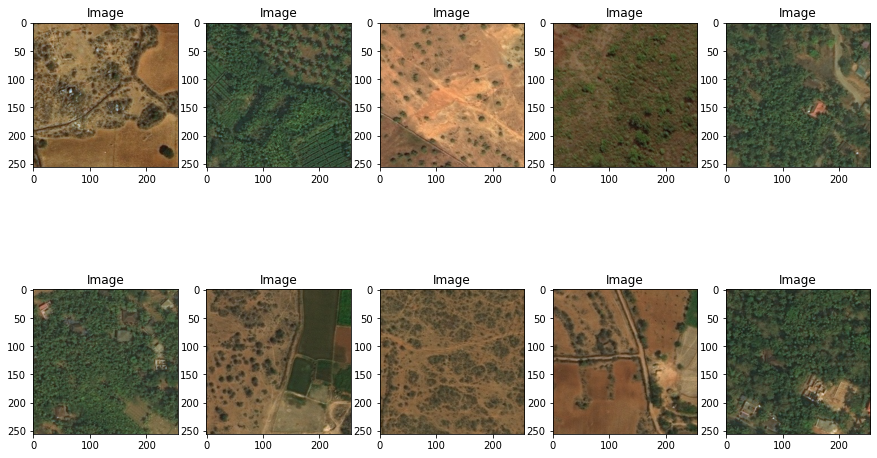

In [12]:
plt.figure(figsize = (15 , 9))
n = 0
for i in range(10):
    n+=1
    plt.subplot(2, 5, n)
    plt.imshow(X[i])
    np.array(X[i])
    plt.title('Image')

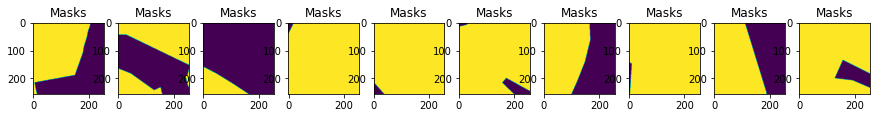

In [13]:
plt.figure(figsize = (15 , 9))
n = 0
for i in range(10):
    n+=1
    plt.subplot(1, 10, n)
    plt.imshow(Y[i])
    np.array(Y[i])
    plt.title('Masks')

In [14]:
aug = A.Compose([A.VerticalFlip(p=0.5), A.RandomRotate90(p=0.5),A.HorizontalFlip(p=1)])
import skimage.io as io

In [16]:
original_image = X 
#io.imread(image)

original_mask  = Y
#io.imread(mask) 

In [20]:
augemented = aug(image = original_image, mask = original_mask)

transformed_image = augemented['image'] 

transformed_mask = augemented['mask'] 

In [47]:
def output(im):
     plt.figure(figsize = (15 , 9))
     n = 0
     for i in range(10):
       n+=1
       plt.subplot(2, 5, n)
       plt.imshow(im[i])
       np.array(im[i])
       plt.title('Image')
    

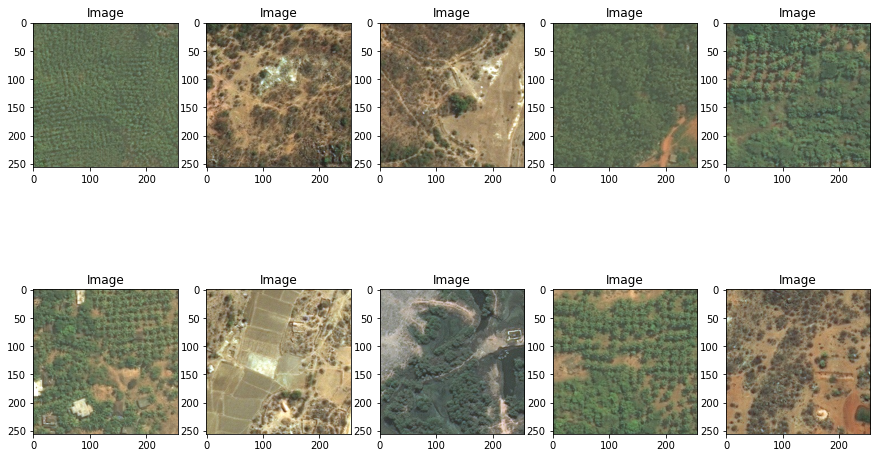

In [48]:
output(transformed_image)

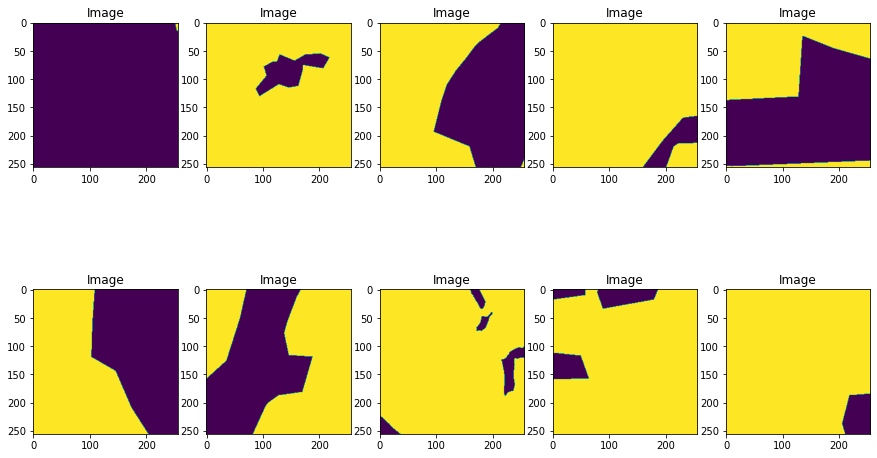

In [49]:
output(transformed_mask)

In [28]:
aug1= A.Compose([A.RandomCrop(width=256,height=256),
                      A.HorizontalFlip(p=0.5),
                      A.RandomBrightnessContrast(p=0.2)])

In [30]:
augemented1 = aug1(image = original_image, mask = original_mask)
transformed_image1 = augemented1['image'] 

transformed_mask1 = augemented1['mask']

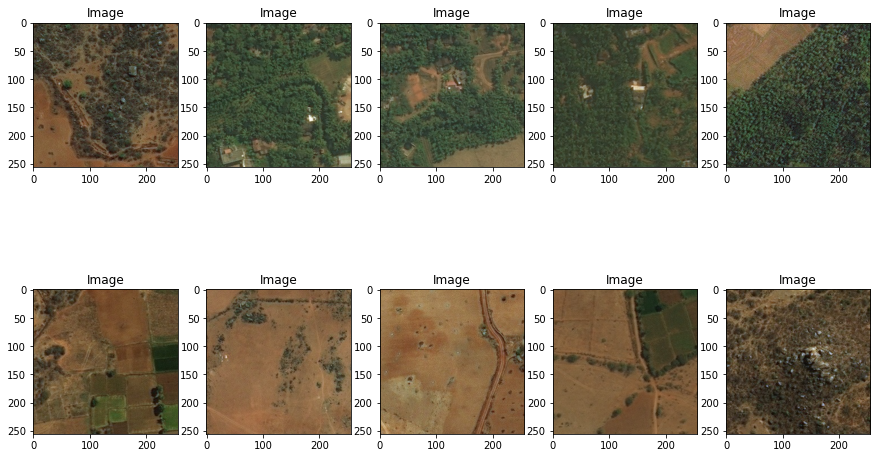

In [50]:
output(transformed_image1)

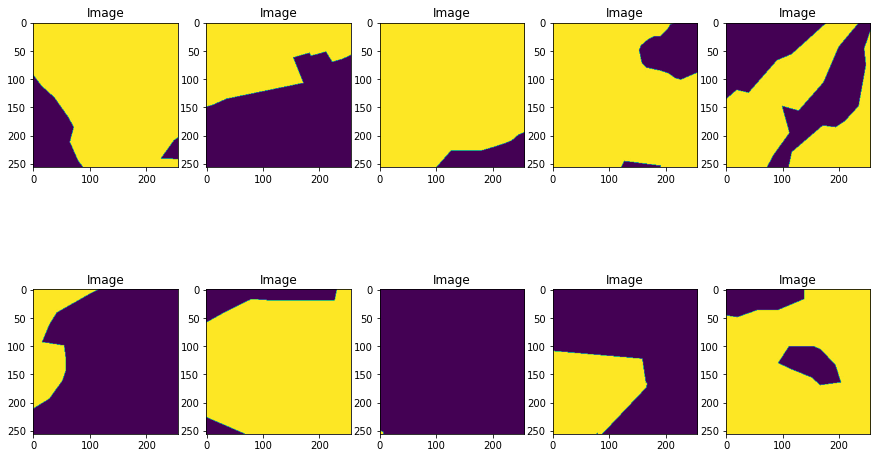

In [51]:
output(transformed_mask1)

In [53]:
aug2 = A.ShiftScaleRotate(p=0.5)
   


In [54]:
augemented2 = aug2(image = original_image, mask = original_mask)
transformed_image2 = augemented2['image'] 

transformed_mask2 = augemented2['mask']

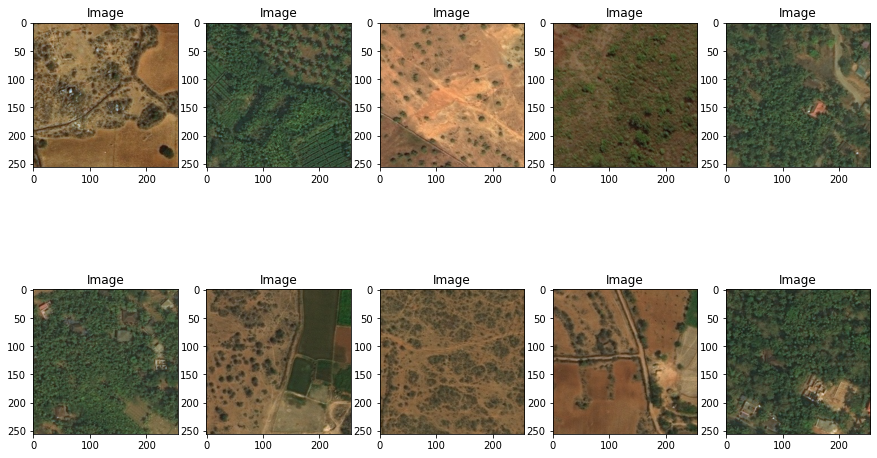

In [56]:
output(transformed_image2)

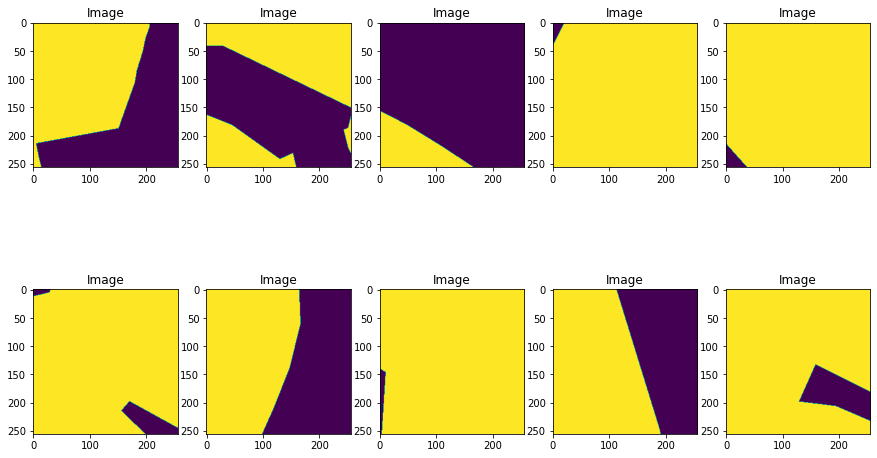

In [57]:
output(transformed_mask2)

In [45]:
def output(im):
     plt.figure(figsize = (15 , 9))
     n = 0
     for i in range(10):
       n+=1
       plt.subplot(2, 5, n)
       plt.imshow(im[i])
       np.array(im[i])
       plt.title('Image')
    

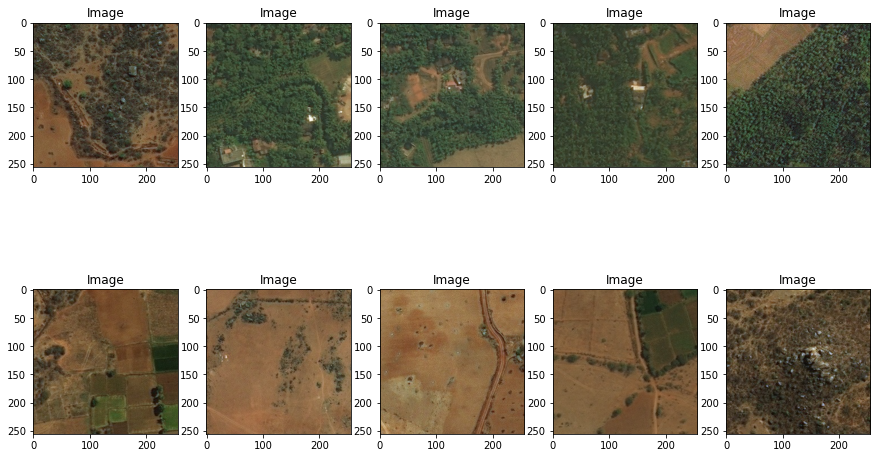

In [46]:
output(transformed_image1)